# Chapter 2: Getting Started (Part C)
**Computer Vision with DSal**

by Ahmad Salehi

**Brightness and Contrast – Mathematical Foundation**

The formula you're using: 𝑔(𝑥) = 𝛼⋅𝑓(𝑥) + 𝛽

where:
- 𝑓(𝑥) is the original pixel value
- 𝑔(𝑥) is the transformed pixel value
- 𝛼 (alpha) is the gain — controls contrast
- 𝛽 (beta) is the bias — controls brightness

Gain (α – Contrast):
- 𝛼>1 : increases contrast
- 0<𝛼<1 : decreases contrast

Bias (β – Brightness):
- 𝛽>0 : increases brightness (makes image lighter)
- 𝛽<0 : decreases brightness (makes image darker)

**cv2.convertScaleAbs()**: This function applies the transformation:

dst(𝑖,𝑗) = saturate(∣𝛼⋅src(𝑖,𝑗)+𝛽∣)

- Applies the transformation efficiently to all pixels.
- Uses saturation arithmetic to keep values in range [0, 255] (important for 8-bit images).
- Automatically converts to absolute values and clips.

**convertScaleAbs()** is the fastest and cleanest way to apply brightness and contrast.

In [1]:
## Importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Output')

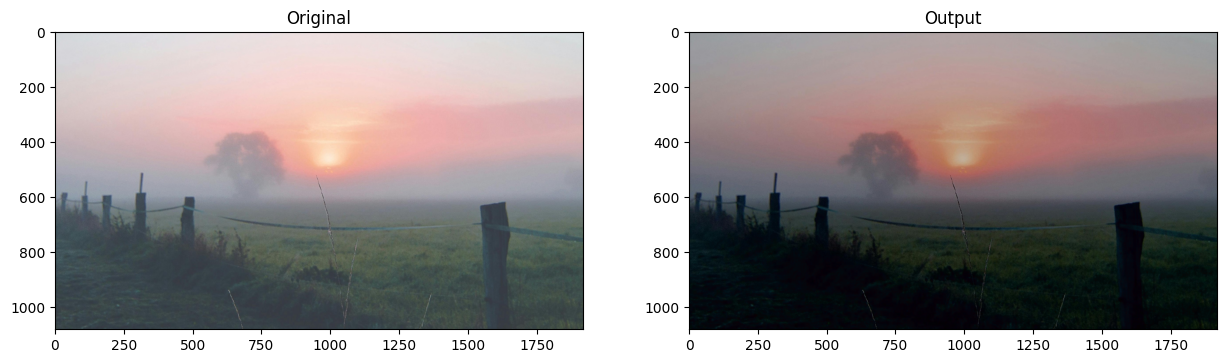

In [40]:
## Using convertScaleAbs() function

image = cv2.imread("./Images/05_Dawn.jpg")
new_image = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(new_image[...,::-1]);plt.title("Output")

# First trial can be alpha = 1 and Beta = -60

Text(0.5, 1.0, 'Output')

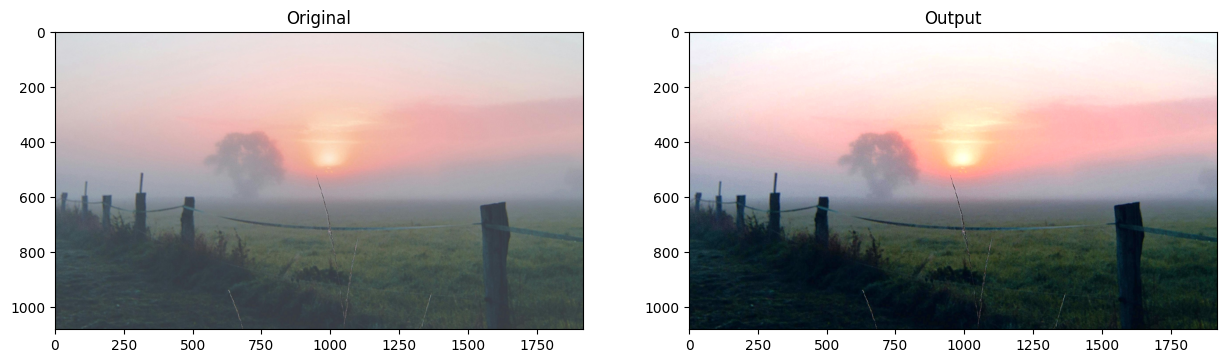

In [33]:
## Using For Loops (Manual Pixel-wise Manipulation)

image = cv2.imread("./Images/05_Dawn.jpg")
new_image2 = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image2[y,x,c] = np.clip(alpha * image[y,x,c] + beta, 0, 255)

plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(new_image2[...,::-1]);plt.title("Output")

# Second trial can be alpha = 1.5 and Beta = -80

for y in range(image.shape[0]):

    for x in range(image.shape[1]):

        for c in range(image.shape[2]):
        
            new_image2[y,x,c] = np.clip(alpha * image[y,x,c] + beta, 0, 255)

What this For Loop does here:
- Goes through every pixel (y, x)
- For every color channel (c): R, G, B
- Applies the formula manually
- Uses np.clip() to ensure values stay in [0, 255]
- But it's slow, especially for large images

**Vectorized Functions**: Vectorization is when you operate on entire arrays (like NumPy arrays) without writing explicit loops.

Why Use Vectorized Code?
- Faster (uses optimized C/C++ under the hood via NumPy/OpenCV).
- Cleaner and more readable.
- Used extensively in Computer Vision, Machine Learning, and Scientific Computing.

is a vectorized operation, applying the formula to the entire image at once, instead of looping through individual pixels.

**Histogram analysis**

A histogram is a graphical representation of the distribution of pixel intensities in an image.

For a grayscale image:
- X-axis: pixel values (0 to 255)
- Y-axis: number of pixels for each intensity

In [42]:
## Histogram analysis

gray_image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
gray_new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)

- Converts the color image (3 channels: BGR) into a single channel grayscale image.
- Makes histogram analysis easier to visualize and interpret (just one intensity per pixel).

C:\Users\ahmad\AppData\Local\Temp\ipykernel_18232\573718799.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(131);plt.hist(gray_image.ravel(),256,[0,256]);plt.title("Original")
C:\Users\ahmad\AppData\Local\Temp\ipykernel_18232\573718799.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(132);plt.hist(gray_new_image.ravel(),256,[0,256]);plt.title("new_image")
C:\Users\ahmad\AppData\Local\Temp\ipykernel_18232\573718799.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(133);plt.hist(gray_new_image2.ravel(),256,[0,256]);plt.title("new_image2")


Text(0.5, 1.0, 'new_image2')

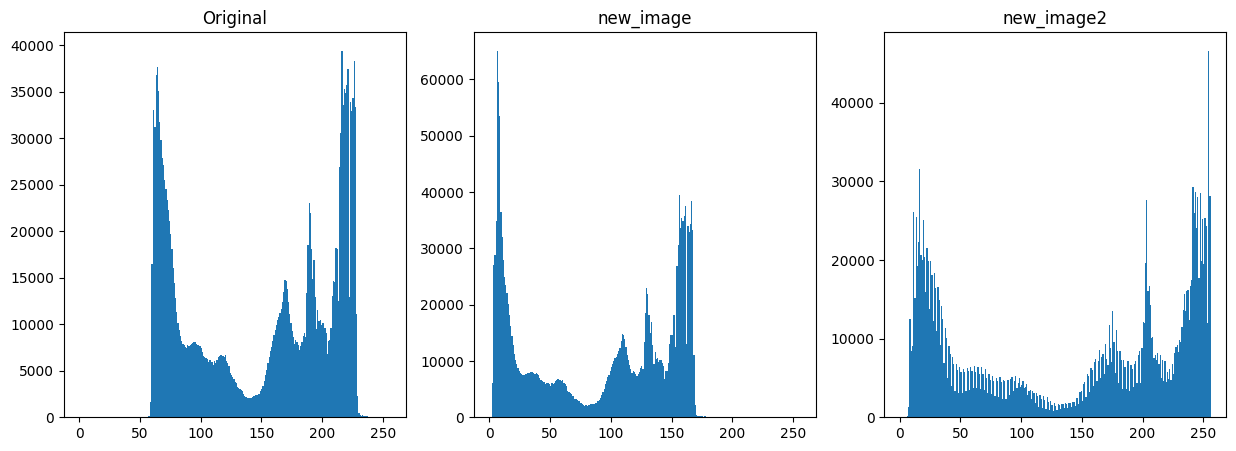

In [43]:
plt.figure(figsize=[15,5])
plt.subplot(131);plt.hist(gray_image.ravel(),256,[0,256]);plt.title("Original")
plt.subplot(132);plt.hist(gray_new_image.ravel(),256,[0,256]);plt.title("new_image")
plt.subplot(133);plt.hist(gray_new_image2.ravel(),256,[0,256]);plt.title("new_image2")

- .ravel() flattens the 2D grayscale image to a 1D array for plotting.
- 256 bins (one for each possible intensity from 0 to 255).
- [0, 256]: the range of pixel values.
- plt.hist() plots the intensity distribution.

**Gamma Correction** is one of the most important non-linear techniques for brightness and contrast adjustment, especially for fixing underexposed or overexposed images.

Formula: Output = (Input/255)^𝛾 * 255
- Non-linear transformation that adjusts brightness/contrast in a perceptual way.
- Pixel values are normalized to [0, 1], then the power-law (gamma) is applied, then scaled back to [0, 255].
- Gamma < 1 (e.g., 0.4) : Brightens the image — good for underexposed images (dark photos).It pulls lower intensities upward without overly blowing out the highlights.
- Gamma > 1 (e.g., 2.2) : Darkens the image — useful for overexposed images (too bright). It compresses the highlights and expands shadows.

Text(0.5, 1.0, 'Output')

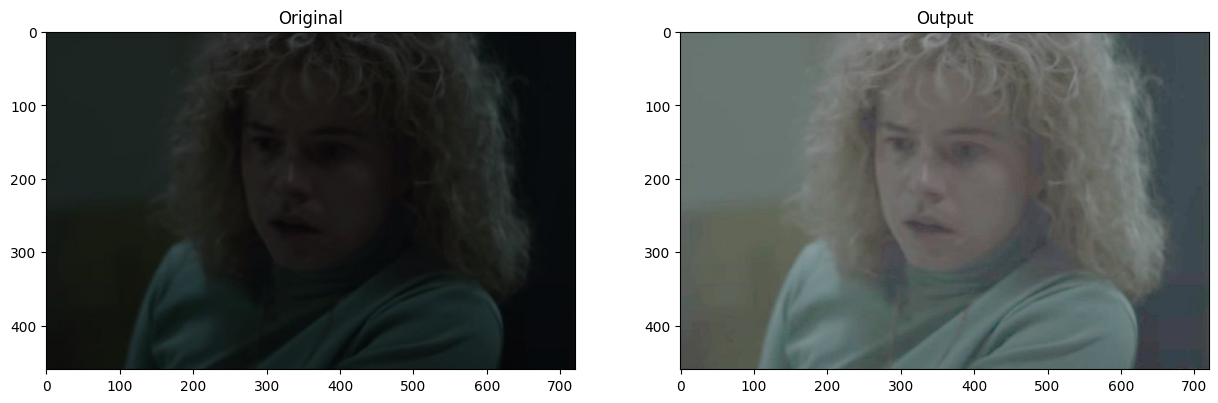

In [44]:
## Gamma correction

gamma = 0.4
img_original = cv2.imread("./Images/06_Underexposed_Face_Image.jpg")
lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
out = cv2.LUT(img_original, lookUpTable)

plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(img_original[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(out[...,::-1]);plt.title("Output")

**Comparison with Linear Method**

**Linear (Brightness/Contrast)**:
- Uniformly adjusts all pixels by scaling and shifting.
- Can saturate bright areas and lose detail in dark regions.

**Gamma Correction**:
- More perceptually aligned with human vision.
- Preserves details in dark areas.
- Better for images with poor lighting.

Text(0.5, 1.0, 'Gamma')

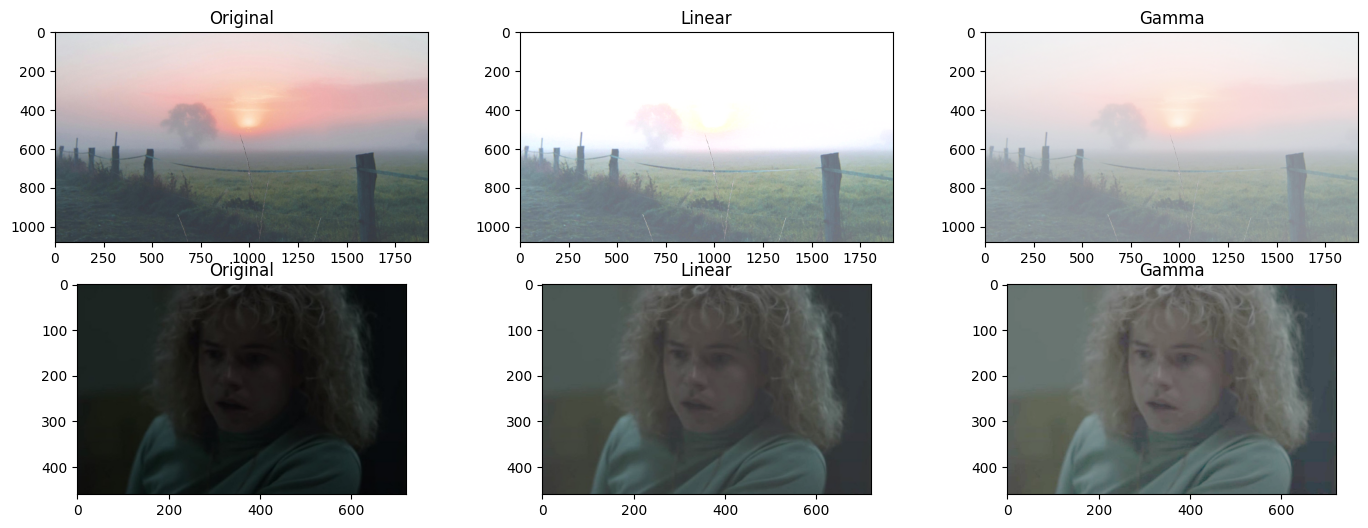

In [45]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.4

img_original1 = cv2.imread("./Images/05_Dawn.jpg")
img_original2 = cv2.imread("./Images/06_Underexposed_Face_Image.jpg")
output_linear1 = cv2.convertScaleAbs(img_original1, alpha=1.3, beta=40)
output_linear2 = cv2.convertScaleAbs(img_original2, alpha=1.3, beta=40)

lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
output_gammacorrected1 = cv2.LUT(img_original1, lookUpTable)
output_gammacorrected2 = cv2.LUT(img_original2, lookUpTable)


plt.figure(figsize=[17,6])
plt.subplot(231);plt.imshow(img_original1[...,::-1]);plt.title("Original")
plt.subplot(232);plt.imshow(output_linear1[...,::-1]);plt.title("Linear")
plt.subplot(233);plt.imshow(output_gammacorrected1[...,::-1]);plt.title("Gamma")

plt.subplot(234);plt.imshow(img_original2[...,::-1]);plt.title("Original")
plt.subplot(235);plt.imshow(output_linear2[...,::-1]);plt.title("Linear")
plt.subplot(236);plt.imshow(output_gammacorrected2[...,::-1]);plt.title("Gamma")

# End of Part B and Chapter 02 (Getting Started)